In [73]:
#Particle Filter with linear motion
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.random import uniform
from numpy.random import randn
from scipy.stats import norm

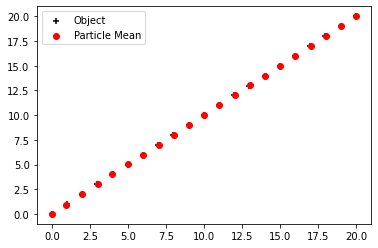

Final location error =  0.02245522055463811
Final variance in particles =  [8.61116789e-09 1.11995696e-08]


In [5]:
def run_linear_particle_filter(number_of_particles = 1000,
                               number_of_iterations = 20,
                               initial_particle_x_range = [-1,1],
                               initial_particle_y_range = [-1,1],
                               initial_object_location = [0,0],
                               object_location_change = [1,1],
                               sensor_std = .1,
                               particle_std = .1):
    '''
    PARAMETERS
     - number_of_particles:       Number of particles in filter
     - number_of_iterations:      Number of iterations in filter
     - initial_particle_x_range:  Initial x range for particles
     - initial_particle_y_range:  Initial y range for particles
     - initial_object_location:   Initial location of object
     - object_location_change:    Change in object location per step
     - sensor_std:                Standard deviation for sensor
     - particle_std:              Standard deviation for particles

    DESCRIPTION
    A particle filter created to estimate the location of
    an object with linear motion. There is uncertainty in
    the system behaviour when we move the particles and
    there is uncertainty in the sensor when we measure
    the distance between particles and the object.
    '''

    # Create an empty array for the location of each particle,
    # storing x coordinates in column 0, y coordinates
    # in column 1

    #Initialize and insert data (particle_locations)
    '''Empty numpy array with size = #_of_particles and 2 columns'''
    '''Use uniform() to distribute x and y coordinates over x and y ranges'''

    particle_locations = np.empty((number_of_particles, 2))
    particle_locations[:, 0] = uniform(initial_particle_x_range[0],
                              initial_particle_x_range[1],
                              size = number_of_particles)
    particle_locations[:, 1] = uniform(initial_particle_y_range[0],
                              initial_particle_y_range[1],
                              size = number_of_particles)

    '''numpy.random.uniform(low=0.0, high=1.0, size=None)
        Draw samples from a uniform distribution.
        Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high).
        In other words, any value within the given interval is equally likely to be drawn by uniform.'''

    # Initialize Weights with zeros (Particle_weights)
    particle_weights = np.zeros(number_of_particles)


    #Initialize object_location with user given data (initial_object_location)
    object_location = initial_object_location

    #Initialize object_locations (with s) with object_location data
    object_locations = np.zeros((number_of_iterations+1,2))
    object_locations[0,:] = [object_location[0],object_location[1]]

    # Initialize particle_means and insert object_location as initial data
    particle_means = np.zeros((number_of_iterations+1,2))
    particle_means[0,:] = [object_location[0],object_location[1]]

    '''Initialize the particle_means vector to acomodate all means
            for the particle_locations, the vector is t+1 in size
        Insert the initial_object_location values as the initial values
            for particle_means and object_locations'''

    # Loop through time steps
    ''' The loop bellow will keep runing while we have iterations to go through..'''
    for iteration in range(number_of_iterations):

        # Move object
        object_location[0] += object_location_change[0]
        object_location[1] += object_location_change[1]
        object_locations[iteration+1,:] = [object_location[0],object_location[1]]

        # Move particles according to object
        # dynamics
        particle_locations[:,0] += object_location_change[0]
        + randn(number_of_particles)*particle_std
        particle_locations[:,1] += object_location_change[1]
        + randn(number_of_particles)*particle_std

        # Update particle weights according to
        # measurements
        distance_between_particles_object = abs(
            np.linalg.norm(particle_locations - object_location, axis=1)
                                             + randn(number_of_particles)*sensor_std)

        particle_weights.fill(1.)
        particle_weights *= 1. / (distance_between_particles_object + 1.e-300)
        particle_weights /= sum(particle_weights)

        # Resample particles based on weights
        # Possibly add in if statement to only resample when weights are small enough
        random_offset = random.random()
        random_positions = [(x + random_offset)/number_of_particles
                            for x in list(range(number_of_particles))]

        # Calculate where in the cumsum these
        # random positions lie and pick that
        # particle to be sampled.
        cumulative_sum = np.cumsum(particle_weights)/sum(particle_weights)

        particle_choices = np.zeros(number_of_particles, 'i')
        i, j = 0, 0
        while i < number_of_particles:
            if random_positions[i] < cumulative_sum[j]:
                particle_choices[i] = j
                i += 1
            else:
                j += 1

        particle_locations[:] = particle_locations[particle_choices]
        particle_weights[:] = particle_weights[particle_choices]

        # Calculate mean and variance of
        # particles
        mean = np.average(particle_locations, weights=particle_weights, axis=0)
        var  = np.average((particle_locations - mean)**2, weights=particle_weights, axis=0)

        # Record particle locations
        particle_means[iteration+1,:] = [mean[0],mean[1]]

    # Plot particle means and object locations
    plt.figure()
    plt.scatter(object_locations[:,0], object_locations[:,1], color = 'k', marker = '+')
    plt.scatter(particle_means[:,0], particle_means[:,1], color = 'r', marker = 'o')
    plt.legend(['Object', 'Particle Mean'])
    plt.show()

    print('Final location error = ', np.linalg.norm(mean - object_location, axis=0))
    print('Final variance in particles = ', var)

run_linear_particle_filter()



In [74]:
#Initial Parameters
number_of_particles = 3
number_of_iterations = 20
initial_particle_x_range = [-1,1]
initial_particle_y_range = [-1,1]
initial_object_location = [0,0]
object_location_change = [1,1]
sensor_std = .1
particle_std = .1

In [75]:
#Initialize and insert data (particle_locations)
'''Empty numpy array with size = #_of_particles and 2 columns'''
'''Use uniform() to distribute x and y coordinates over x and y ranges'''

particle_locations = np.empty((number_of_particles, 2))
particle_locations[:, 0] = uniform(initial_particle_x_range[0],
                          initial_particle_x_range[1],
                          size = number_of_particles)
particle_locations[:, 1] = uniform(initial_particle_y_range[0],
                          initial_particle_y_range[1],
                          size = number_of_particles)

# Initialize Weights with zeros (Particle_weights)
particle_weights = np.zeros(number_of_particles)


#Initialize object_location with user given data (initial_object_location)
object_location = initial_object_location

#Initialize object_locations (with s) with object_location data
object_locations = np.zeros((number_of_iterations+1,2))
object_locations[0,:] = [object_location[0],object_location[1]]

# Initialize particle_means and insert object_location as initial data
particle_means = np.zeros((number_of_iterations+1,2))
particle_means[0,:] = [object_location[0],object_location[1]]


In [76]:
# Loop through time steps
''' The loop bellow will keep runing while we have iterations to go through..'''
for iteration in range(number_of_iterations):
    
    # Move object
    object_location[0] += object_location_change[0]
    object_location[1] += object_location_change[1]
    object_locations[iteration+1,:] = [object_location[0],object_location[1]]
    print(object_locations)
    
    # Move particles according to object
    # dynamics
    particle_locations[:,0] += object_location_change[0]
    + randn(number_of_particles)*particle_std
    particle_locations[:,1] += object_location_change[1]
    + randn(number_of_particles)*particle_std
    
    
    # Update particle weights according to
    # measurements
    distance_between_particles_object = abs(
        np.linalg.norm(particle_locations - object_location, axis=1)
                                         + randn(number_of_particles)*sensor_std)

    particle_weights.fill(1.)
    particle_weights *= 1. / (distance_between_particles_object + 1.e-300)
    particle_weights /= sum(particle_weights)

    # Resample particles based on weights
    # Possibly add in if statement to only resample when weights are small enough
    random_offset = random.random()
    random_positions = [(x + random_offset)/number_of_particles
                        for x in list(range(number_of_particles))]

    # Calculate where in the cumsum these
    # random positions lie and pick that
    # particle to be sampled.
    cumulative_sum = np.cumsum(particle_weights)/sum(particle_weights)

    particle_choices = np.zeros(number_of_particles, 'i')
    i, j = 0, 0
    while i < number_of_particles:
        if random_positions[i] < cumulative_sum[j]:
            particle_choices[i] = j
            i += 1
        else:
            j += 1

    particle_locations[:] = particle_locations[particle_choices]
    particle_weights[:] = particle_weights[particle_choices]

    # Calculate mean and variance of
    # particles
    mean = np.average(particle_locations, weights=particle_weights, axis=0)
    var  = np.average((particle_locations - mean)**2, weights=particle_weights, axis=0)

    # Record particle locations
    particle_means[iteration+1,:] = [mean[0],mean[1]]

[[0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [1. 1.]
 [2. 2.]
 [3. 3.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [1. 1.]
 [2. 2.]
 [3. 3.]
 [4. 4.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [1. 1.]
 [2. 2.]
 [3. 3.]
 [4. 4.]
 [5. 5.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [1. 1.]
 [2. 2.]
 [3. 3.]
 [4. 4.]
 [5. 

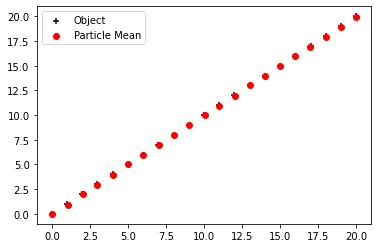

Final location error =  0.0656750968224816
Final variance in particles =  [2.82439446e-07 8.65404265e-07]


In [44]:
# Plot particle means and object locations
plt.figure()
plt.scatter(object_locations[:,0], object_locations[:,1], color = 'k', marker = '+')
plt.scatter(particle_means[:,0], particle_means[:,1], color = 'r', marker = 'o')
plt.legend(['Object', 'Particle Mean'])
plt.show()

print('Final location error = ', np.linalg.norm(mean - object_location, axis=0))
print('Final variance in particles = ', var)